In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [9]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [10]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [13]:
# reflect an existing database into a new model
base = automap_base()

# reflect the tables
base.prepare(engine, reflect = True)



In [14]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [23]:
# Save references to each table
measurement = base.classes.measurement

station = base.classes.station

# Inspect
inspector = inspect(engine)

print("Measurement:")

columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

print("===============================")
    
print("Station:")
    
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

Measurement:
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
Station:
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [24]:
# Create our session (link) from Python to the DB
session = Session(bind = engine)

# Exploratory Precipitation Analysis

In [33]:
# Find the most recent date in the data set.
most_recent = session.query(measurement.date).order_by(measurement.date.desc()).first()
most_recent

('2017-08-23',)

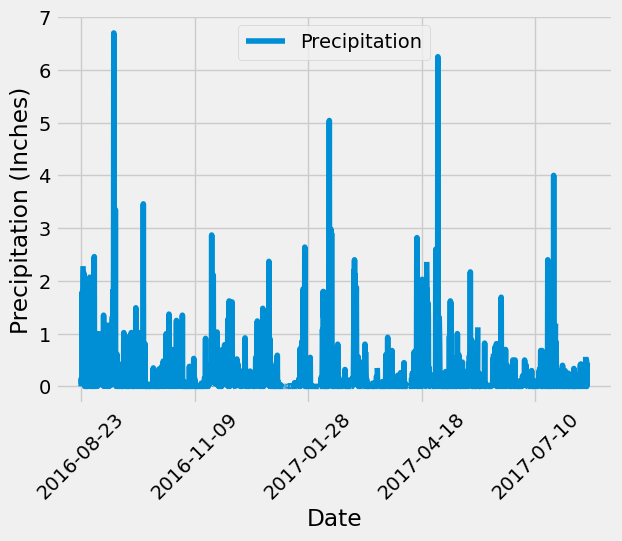

In [48]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent

# Calculate the date one year from the last date in data set.
recent = dt.datetime.strptime(most_recent[0], '%Y-%m-%d')
start_date = recent - dt.timedelta(days=365)
# print(start_date)

# Perform a query to retrieve the data and precipitation scores
precip_values = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date > '2016-08-22').\
    order_by(measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_df = pd.DataFrame(precip_values, columns = ['Date', 'Precipitation'])

# Sort the dataframe by date
# precip_df is already sorted by date
precip_df

# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot('Date', 'Precipitation')
plt.xticks(rotation = 45)
plt.xlabel('Date')
plt.ylabel('Precipitation (Inches)')
plt.show()

In [47]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset


[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

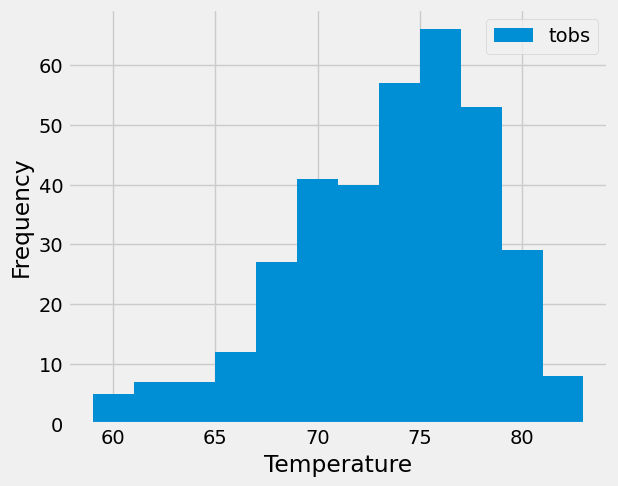

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()